Training an agent to play cart-pole-v1 atari game using Deep Q-Learning

Mentee Name : Bussa Abhinay Kumar Reddy
Roll-No. : 22B0904

Installed following packages with respective versions:

Gym 0.26.2
Keras 2.13.1
TensorFlow 2.13.0


Importing necessary libraries...

In [ ]:
import gym
import random
import atari_py
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


episodes = 1000

DQNAgent Implementation:

This class defines a Deep Q-Network (DQN) agent with methods to build the neural network model used for decision-making.

The __init__ method initializes the agent's parameters, including the state and action sizes, replay memory, discount factor, exploration rate, learning rate, and the model. 

The _build_model method constructs the neural network with two hidden layers, each with 24 neurons and ReLU activation, and an output layer with a linear activation function. The model is compiled with mean squared error loss and the Adam optimizer.

In [2]:
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95    
        self.epsilon = 1.0  
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse',
                      optimizer=Adam(learning_rate=self.learning_rate))
        return model

This method stores experiences as tuples in the agent's replay memory. These experiences are used later for training the model.

In [ ]:
    def memorize(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

The act method selects an action based on the current state. It either chooses a random action (exploration) with probability epsilon or selects the action with the highest predicted value from the model (exploitation).

The replay method trains the DQN model using a random sample of experiences from the agent's memory. For each experience in the minibatch, it calculates the target Q-value: if the episode is not done, it includes the discounted maximum future reward; otherwise, it uses the immediate reward. The model then predicts the Q-values for the current state, updates the Q-value for the taken action with the target, and fits the model to these updated Q-values. This process helps the model learn from past experiences and reduces overfitting by using a varied set of experiences. The exploration rate epsilon is gradually reduced to shift from exploration to exploitation over time.

In [ ]:
    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])  

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
              target = reward + self.gamma * \
                       np.amax(self.model.predict(next_state)[0])
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

Training the Agent:

This script initializes the CartPole environment and a DQN agent, then iterates through episodes of the game. For each episode, it resets the state, interacts with the environment by selecting actions, and stores the experiences. If an episode ends, it prints the score and trains the agent using experiences from the replay memory. The total reward for each episode is stored for future plotting.

In [3]:
episode_rewards=[]
if __name__ == "__main__":

    # initialize gym environment and the agent
    env = gym.make('CartPole-v1')
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n
    agent = DQNAgent(state_size, action_size)
    episode_rewards1 = []

    # Iterate the game
    for e in range(episodes):

        # reset state in the beginning of each game
        state = env.reset()[0]
        state = np.reshape(state, [1, state_size])
        total_reward = 0
        for time_t in range(500):
            
            env.render()

           
            action = agent.act(state)

           
            next_state, reward, done, truncated,info = env.step(action)
            next_state = np.reshape(next_state, [1, state_size])

            # memorize the previous state, action, reward, and done
            agent.memorize(state, action, reward, next_state, done)

            # make next_state the new current state for the next frame.
            state = next_state
            total_reward += reward
            
            if done:
                print("episode: {}/{}, score: {}"
                     .format(e, episodes, time_t))
                break

        # train the agent with the experience of the episode
        # append rewards for plotting the graph
        episode_rewards1.append(total_reward)
        agent.replay(19)
    episode_rewards = episode_rewards1    


c:\Users\bussa\anaconda3\envs\atari_game\lib\site-packages\gym\envs\classic_control\cartpole.py:211: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("CartPole-v1", render_mode="rgb_array")
  gym.logger.warn(
c:\Users\bussa\anaconda3\envs\atari_game\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


episode: 0/1000, score: 22
1/1 [==============================] - 0s 12ms/step
episode: 1/1000, score: 16
1/1 [==============================] - 0s 20ms/step
episode: 2/1000, score: 30
1/1 [==============================] - 0s 25ms/step
episode: 3/1000, score: 28
1/1 [==============================] - 0s 36ms/step
episode: 4/1000, score: 12
1/1 [==============================] - 0s 22ms/step
episode: 5/1000, score: 33
1/1 [==============================] - 0s 18ms/step
episode: 6/1000, score: 27
1/1 [==============================] - 0s 17ms/step
episode: 7/1000, score: 57
1/1 [==============================] - 0s 14ms/step
episode: 8/1000, score: 14
1/1 [==============================] - 0s 16ms/step
episode: 9/1000, score: 9
1/1 [==============================] - 0s 19ms/step
episode: 10/1000, score: 28
1/1 [==============================] - 0s 20ms/step
episode: 11/1000, score: 16
1/1 [==============================] - 0s 24ms/step
episode: 12/1000, score: 13
1/1 [==================

plotting the graph:

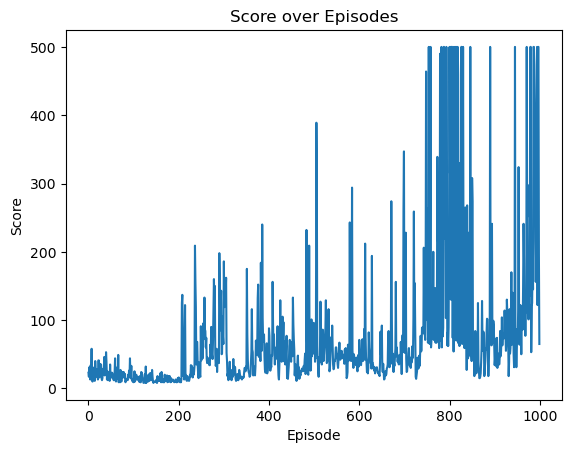

In [4]:
import matplotlib.pyplot as plt

plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Score')
plt.title('Score over Episodes')
plt.show()